# European Cities temperature prediction
The primary objective of this project is to build a predictive model that can estimate  average temperatures of cities in Europe. This falls under the category of **Supervised Machine Learning** because we are training a model on a dataset where we already know the correct answers (existing temperature numbers).
# Outline
- [ 1 - Setup and imports](#1)
- [ 2 - Main workflow](#2)
  - [ 2.1 - Load Data](#2.1)
  - [ 2.2 - Data cleaning and preprocessing](#2.2)
  - [ 2.3 - Feature engineering](#2.3)
  - [ 2.4 - Model training](#2.4)
  - [ 2.5 - Model evaluation](#2.5)
  - [ 2.6 - Save results](#2.6)

<a name="1"></a>
## 1 - Setup and imports 

The notebook imports essential Python libraries like `pandas`, `numpy`, `matplotlib`, `seaborn`, and `scikit-learn`. It then loads the `dataset.csv` file into a pandas DataFrame.
 - [pandas](https://pandas.pydata.org/) library provides the `DataFrame` object, which is a powerful and flexible 2D labeled data structure, similar to a spreadsheet or a SQL table. It is the standard for data manipulation and analysis in Python.
 - [numpy](https://www.numpy.org) is ssed for efficient numerical operations, especially on large arrays of data. Many machine learning libraries, including scikit-learn, are built on top of NumPy.
 - [matplotlib](https://matplotlib.org) & [seaborn](https://seaborn.pydata.org/) are data visualization libraries. Visualization helps us understand the data's distribution, relationships, and potential patterns before modeling.
 - [scikit-learn](https://scikit-learn.org/stable/) This is the core machine learning library used in the project. It provides simple and efficient tools for data mining and data analysis, including models, preprocessing tools, and metrics.
 - ``my_utils.py`` and ``model_training_and_evaluation.py`` contain helper functions for this assignment.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

import sys
import os
import joblib
sys.path.append(os.path.abspath('../src'))
from my_utils import load_data_csv, extract_features, create_target_variable
from model_training_and_evaluation import train_linear_regression, evaluate_model, plot_predictions
sns.set_style("whitegrid")

## 2 -  Main workflow

This section executes the entire machine learning pipeline from data loading to model evaluation.

### 2.1 Load Data

Notebook loads data using load_data_csv helper function from provided data file path into Dataframe object. Method `.head()` provides a quick preview of the first few rows, helping to confirm that the data was loaded correctly and giving a sense of the columns and values.

In [2]:
# Define the path to the raw data
DATA_PATH = '../data/dataset.csv' 

# Load the dataset
df = load_data_csv(DATA_PATH)

# Display the first few rows
if df is not None:
    display(df.head())

Data loaded successfully from ../data/dataset.csv


,city,latitude,longitude,elevation,avg temp
0,Tirana,41,19,110,16.0
1,Andora la vella,42,1,1023,10.0
2,Yerevan,40,44,1100,12.6
3,Vienna,48,16,350,9.5
4,Baku,40,49,28,15.4


### 2.2 Data Cleaning & Preprocessing

Raw data sometimes need cleaning and pre-processing. In this simple example we remove spaces from column names. Method `.info()` displays the data types of each column and the number of non-null values. This helps identify missing values, which need to be handled before training a model. In this dataset, there are no missing values.

In [3]:
# Example preprocessing steps (customize as needed)
if df is not None:
    # Join multiple words column name with underscore
    df['avg_temp'] = df['avg temp']
    # remove spaces from column names 
    df.columns = df.columns.str.replace(' ', '')
    
    print("Data preprocessing complete.")
    display(df.info()) 

Data preprocessing complete.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       41 non-null     object 
 1   latitude   41 non-null     int64  
 2   longitude  41 non-null     int64  
 3   elevation  41 non-null     int64  
 4   avgtemp    41 non-null     float64
 5   avg_temp   41 non-null     float64
dtypes: float64(2), int64(3), object(1)
memory usage: 2.1+ KB


None

### 2.3 Feature Engineering

In supervised learning, we need to define the inputs and the output for our model. Data are separated in features (X) and target (y) variables using extract_features and create_target_variable helper functions. Features (X) are the independent variables or predictors that the model will use to make a prediction. Here, X is a DataFrame containing the `latitude` column. Target Variable (y) is the dependent variable or the outcome we are trying to predict. Here, y is the `avg_temp` column. The model's goal is to learn the mathematical relationship `f(X) ≈ y`.

In [4]:
if df is not None:
    # Define feature and target columns
    FEATURE_COLUMNS = ['latitude'] # Replace with your feature names
    TARGET_COLUMN = ['avg_temp'] # Replace with your target name
    
    # Extract features and target
    X = extract_features(df, FEATURE_COLUMNS)
    y = create_target_variable(df, TARGET_COLUMN)

    display(X.head())
    display(y.head())

,latitude
0,41
1,42
2,40
3,48
4,40


,avg_temp
0,16.0
1,10.0
2,12.6
3,9.5
4,15.4


### 2.4 Model Training

 - We use train_test_split from scikit-learn to divide the data into a training set (80%) and a testing set (20%). This is one of the most fundamental concepts in machine learning. We cannot evaluate our model's performance on the same data it was trained on, as this would not measure its ability to generalize to new, unseen data. 
 - The model "learns" from training set by adjusting its internal parameters to find patterns that map the features (X) to the target (y). Testing set is kept separate and "unseen" by the model during training. After the model is trained, we use it to make predictions on the test set and compare these predictions to the actual values. This gives an unbiased estimate of the model's performance on real-world data.
  - Model training creates an instance of the LinearRegression model and then fits it to the training data using the `.fit()` method. Model assumes a linear relationship between the features and the target. It tries to find the optimal coefficients (β) for the equation: `Avg Temp = β₀ + β₁ * Latitude`, `β₀` is the intercept and  `β₁` is the coefficient of the feature.
 - During the fitting step, the algorithm uses a method called Ordinary Least Squares (OLS). OLS works by finding the line (or hyperplane, in multiple dimensions) that minimizes the sum of the squared residuals. A residual is the difference between an actual observed value (`y_train`) and the value predicted by the model. By minimizing the sum of these squared differences, the model finds the "best fit" line for the training data.

In [5]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
trained_model = train_linear_regression(X_train, y_train)

Model training complete.


### 2.5 Model Evaluation

 - Model evaluation calculates and prints the Mean Squared Error (MSE) and the R-squared (R²) score by comparing the actual test values (`y_test`) with the predicted values (`y_pred`). MSE measures the average of the squares of the errors. It gives a sense of how far the predictions are from the actual values. A lower MSE is better. Squaring the errors has the effect of penalizing larger errors more heavily. R² is a very common and intuitive metric for regression. It represents the proportion of the variance in the target variable (`Sales`) that is explained by the model's features. An R² score of 1.0 means the model perfectly explains all the variability in the data. An R² of 0.90, for example, means that 90% of the variation in sales can be explained by the advertising budgets in the model. The remaining 10% is due to other factors not included in the model or random noise. A higher R² is generally better.
 - We use trained model's `.predict()` method on the test features (`X_test`) to generate predictions (`y_pred`).
 - Visualizing results creates a scatter plot comparing the actual test values (`y_test`) with the predicted values (`y_pred`). If the model were perfect, all the points would lie on a straight 45-degree line (where `y_test` equals `y_pred`). In reality, the points will be scattered around this line. The tighter the cluster of points around the line, the better the model's predictions.

Mean Squared Error: 10.5769
R-squared: 0.4226


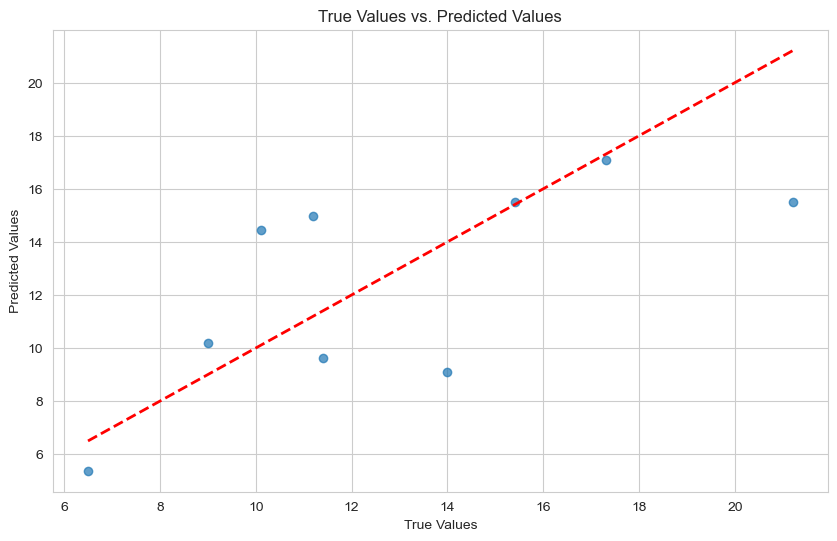

In [7]:
# Evaluate the model
evaluation_metrics = evaluate_model(trained_model, X_test, y_test)

# Plot predictions vs. true values
predictions = trained_model.predict(X_test)
plot_predictions(y_test, predictions)

### 2.6 Save Results

In [8]:
# Create directories if they don't exist
os.makedirs('../results/models', exist_ok=True)
os.makedirs('../results/figures', exist_ok=True)

# Save the trained model
MODEL_PATH = '../results/models/linear_regression_model.joblib'
joblib.dump(trained_model, MODEL_PATH)
print(f"Model saved to {MODEL_PATH}")

# Save the prediction plot
FIGURE_PATH = '../results/figures/prediction_plot.png'
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [predictions.min(), predictions.max()], '--r', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs. Predicted Values')
plt.savefig(FIGURE_PATH)
print(f"Plot saved to {FIGURE_PATH}")

Model saved to ../results/models/linear_regression_model.joblib
Plot saved to ../results/figures/prediction_plot.png
